<p><font size="6" color='grey'> <b>

Generative KI. Verstehen. Anwenden. Gestalten.
</b></font> </br></p>

<p><font size="5" color='grey'> <b>
SQL RAG mit Chat-Historie
</b></font> </br></p>


---

In [1]:
#@title 🔧 Umgebung einrichten{ display-mode: "form" }
!uv pip install --system -q git+https://github.com/ralf-42/GenAI.git#subdirectory=04_modul
from genai_lib.utilities import check_environment, get_ipinfo, setup_api_keys, mprint, install_packages, mermaid
setup_api_keys(['OPENAI_API_KEY', 'HF_TOKEN'], create_globals=False)
print()
check_environment()
print()
get_ipinfo()

✓ OPENAI_API_KEY erfolgreich gesetzt
✓ HF_TOKEN erfolgreich gesetzt

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Installierte LangChain- und LangGraph-Bibliotheken:
langchain                                1.1.0
langchain-chroma                         1.0.0
langchain-classic                        1.0.0
langchain-community                      0.4.1
langchain-core                           1.1.0
langchain-ollama                         1.0.0
langchain-openai                         1.1.0
langchain-text-splitters                 1.0.0
langgraph                                1.0.3
langgraph-checkpoint                     3.0.1
langgraph-prebuilt                       1.0.5
langgraph-sdk                            0.2.10

IP-Adresse: 34.16.151.162
Hostname: 162.151.16.34.bc.googleusercontent.com
Stadt: Las Vegas
Region: Nevada
Land: US
Koordinaten: 36.1750,-115.1372
Provider: AS396982 Google LLC
Postleitzahl: 89111
Zeitzone: America/Los_Angeles


In [2]:
#@title 📂 Datenbank { display-mode: "form" }
# Northwind-Datenbank herunterladen
!rm -rf northwind.db
!curl -L https://raw.githubusercontent.com/ralf-42/GenAI/main/02_daten/05_sonstiges/northwind.db -o northwind.db

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.5M  100 23.5M    0     0  16.3M      0  0:00:01  0:00:01 --:--:-- 16.3M


# 1 | Einführung in SQL RAG
---

SQL RAG ist eine Technologie, die Large Language Models (LLMs) mit Datenbankabfragen kombiniert. Sie ermöglicht es, natürlichsprachliche Anfragen in SQL-Abfragen zu übersetzen und die Ergebnisse intelligent zu interpretieren.

Diese Technologie überbrückt die Lücke zwischen menschlicher Sprache und Datenbankstrukturen, indem sie:

- Natürliche Sprache in präzise SQL-Abfragen umwandelt
- Datenbankschemas analysiert, um korrekte Abfragen zu generieren
- Die Abfrageergebnisse in verständliche Antworten umformuliert

SQL RAG erweitert die Fähigkeiten von LLMs, indem es ihnen Zugriff auf strukturierte Daten ermöglicht und so präzisere, faktenbasierte Antworten liefert.

<p><font color='black' size="5">
Warum SQL für RAG?
</font></p>



Das Erstellen eines Retrieval-Augmented Generation (RAG)-Systems bringt mehrere Herausforderungen mit sich, aber SQL könnte helfen, diese zu bewältigen:

- **SQL kann helfen, komplexe Daten abzurufen**
    
    Das Abrufen relevanter Informationen aus riesigen und vielfältigen Datensätzen kann komplex sein, insbesondere beim Umgang mit unstrukturierten oder semistrukturierten Datenquellen wie Textdokumenten, Bildern oder Multimedia. Die Integration effizienter Retrieval-Mechanismen, die diese Komplexität bewältigen können, ist eine bedeutende Herausforderung. Die Abfragefunktionen von SQL ermöglichen den effizienten Abruf relevanter Informationen aus diesen Datenquellen. Durch das Generieren von SQL-Abfragen, die auf bestimmte Kriterien zugeschnitten sind, und die Nutzung erweiterter Suchfunktionen kann SQL den Datenabrufprozess optimieren und so die Komplexität des Zugriffs auf verschiedene Datensätze bewältigen.
    
- **SQL kann helfen, Qualitätsdaten abzurufen**
    
    Die Sicherstellung der Qualität und Relevanz der abgerufenen Daten ist entscheidend für die Generierung genauer und sinnvoller Antworten. Verrauschte oder veraltete Daten sowie irrelevante Informationen können die Leistung des RAG-Systems jedoch negativ beeinflussen. Die Entwicklung von Algorithmen zum effektiven Filtern und Ranking abgerufener Daten ist eine Herausforderung. SQL bietet Mechanismen zum Filtern und Ranking abgerufener Daten basierend auf verschiedenen Kriterien wie Zeitstempeln, Kategorien oder Relevanzwerten.
    
- **SQL bietet Skalierbarkeit und Flexibilität**
    
    Da Datensätze an Größe und Komplexität zunehmen, wird Skalierbarkeit zu einer großen Herausforderung für RAG-Systeme. Die Sicherstellung, dass das System mit zunehmenden Datenmengen umgehen kann und gleichzeitig Leistung und Reaktionsfähigkeit aufrechterhält, erfordert ein effizientes Architekturdesign und Optimierungsstrategien. SQL-Datenbanken sind darauf ausgelegt, riesige Mengen strukturierter Daten effizient zu verwalten. Die Integration von SQL in RAG-Systeme adressiert eine der wichtigsten Herausforderungen im Bereich der KI: die Skalierung des Retrieval-Mechanismus zur Handhabung umfangreicher Datensätze, ohne die Leistung zu beeinträchtigen. Darüber hinaus ermöglicht die Flexibilität von SQL bei der Formulierung von Abfragen RAG, komplexe Informationen abzurufen und dabei die Breite und Tiefe der während des Generierungsprozesses berücksichtigten Daten anzupassen.
    
- **SQL hilft beim Abrufen von Echtzeitdaten**
    
    Die Bereitstellung von Echtzeitantworten ist für viele Anwendungen von RAG-Systemen, wie z. B. Chatbots oder virtuelle Assistenten, von entscheidender Bedeutung. Das Erreichen niedriger Latenzzeiten bei gleichzeitiger Aufrechterhaltung der Qualität der generierten Inhalte stellt eine Herausforderung dar, insbesondere in Szenarien mit strengen Latenzanforderungen. Die Optimierungstechniken von SQL, wie z. B. Query-Caching und Indizierung, können die Query-Verarbeitungszeiten erheblich reduzieren und es RAG-Systemen ermöglichen, Echtzeitantworten bereitzustellen.
    


# 2 | Vergleich SQL RAG vs RAG
---

Während sowohl SQL RAG als auch RAG (Retrieval-Augmented Generation) die Fähigkeiten von LLMs erweitern, gibt es wichtige Unterschiede:



| Merkmal         | SQL RAG      | Retrieval-Augmented Generation (RAG)    |
| --------------- | ------------------------------------ | --------------------------------------- |
| Datenquelle     | Strukturierte Datenbanken            | Textdokumente, Wissensbasen             |
| Abfragemethode  | SQL-Generierung                      | Semantische Suche, Embedding-Vergleiche |
| Datenstruktur   | Schema-basiert, tabellarisch         | Unstrukturiert oder semi-strukturiert   |
| Genauigkeit     | Präzise durch Datenbankintegrität    | Abhängig von der Retrieval-Qualität     |
| Anwendungsfälle | Geschäftsanalysen, Berichterstellung | Dokumentensuche, Wissensbasis-Anfragen  |
| Aktualisierung  | In Echtzeit durch aktuelle DB-Daten  | Erfordert Neuindexierung bei Änderungen |



SQL RAG eignet sich besonders für Szenarien, in denen präzise, aktuelle Daten benötigt werden, während RAG Stärken bei der Verarbeitung großer Textmengen hat.



# 3 | Integration LLM und DB
---



Die Integration von LLMs mit Datenbanken erfolgt über mehrere Komponenten:

1. **Schema-Analyse**: Das LLM muss das Datenbankschema verstehen (Tabellen, Spalten, Beziehungen)
2. **Anfrage-Übersetzung**: Umwandlung der natürlichsprachlichen Anfrage in SQL
3. **Abfrage-Ausführung**: Verbindung zur Datenbank und Ausführung der generierten SQL-Abfrage
4. **Ergebnis-Interpretation**: Analyse und Interpretation der Abfrageergebnisse

<img src="https://raw.githubusercontent.com/ralf-42/GenAI/main/07_image/sql_rag_process.png" width="750" alt="Avatar">


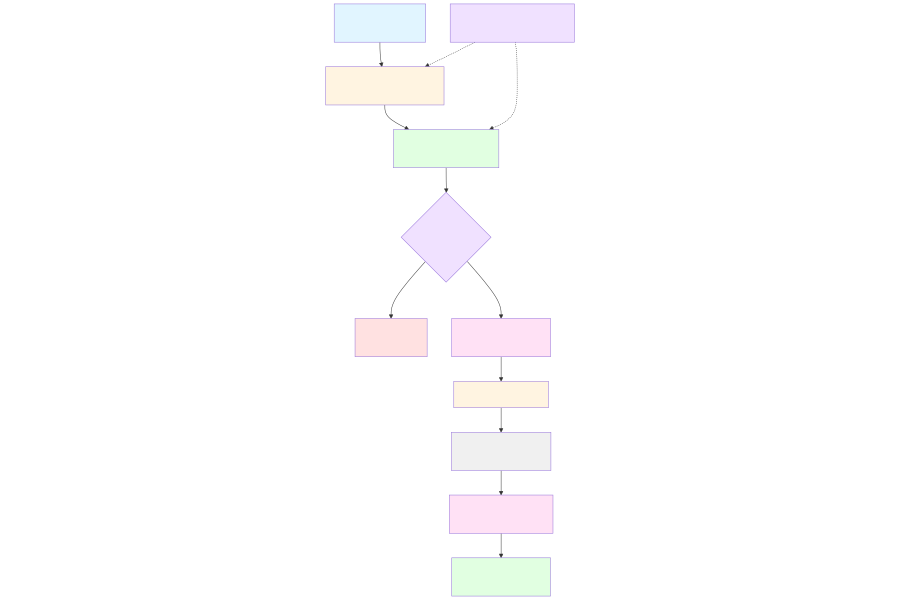

In [3]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Mermaid - SQL RAG Pipeline</font> </br></p>

diagram = """
graph TB
    A["👤 User Query<br/>Natural Language"] --> B["🧠 Schema Analysis<br/>LLM versteht DB-Struktur"]
    B --> C["🔧 SQL Generation<br/>NL → SQL Translation"]
    C --> D{SQL Validation<br/>Sicher?}
    D -->|Nein| E["❌ Fehler-<br/>behandlung"]
    D -->|Ja| F["(🗄️ Database<br/>SQLite/PostgreSQL)"]
    F --> G["📊 Query Execution"]
    G --> H["📋 Results<br/>Tabellarische Daten"]
    H --> I["🤖 LLM Analysis<br/>Result Interpretation"]
    I --> J["✅ Natural Language<br/>Answer"]

    K["📐 DB Schema<br/>Tables, Columns, Relations"] -.-> B
    K -.-> C

    style A fill:#e1f5ff
    style B fill:#fff4e1
    style C fill:#e1ffe1
    style D fill:#f0e1ff
    style E fill:#ffe1e1
    style F fill:#ffe1f5
    style G fill:#fff4e1
    style H fill:#f0f0f0
    style I fill:#ffe1f5
    style J fill:#e1ffe1
    style K fill:#f0e1ff
"""
mermaid(diagram, width=900, height=600)

In [4]:
# Grundlegender SQL RAG-Ablauf
from langchain.chat_models import init_chat_model
from langchain_community.utilities import SQLDatabase

# 1. Datenbankverbindung herstellen
db = SQLDatabase.from_uri("sqlite:///northwind.db")

# 2. LLM initialisieren
model_provider="openai"
model_name = "gpt-4o-mini"
temperature = 0.0
llm = init_chat_model(model_name, model_provider=model_provider, temperature=temperature)

In [5]:
# 3. Datenbankschema abrufen
schema = db.get_table_info()
print(schema)


CREATE TABLE "Categories" (
	"CategoryID" INTEGER, 
	"CategoryName" TEXT, 
	"Description" TEXT, 
	"Picture" BLOB, 
	PRIMARY KEY ("CategoryID")
)

/*
3 rows from Categories table:
CategoryID	CategoryName	Description	Picture
1	Beverages	Soft drinks, coffees, teas, beers, and ales	b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x0
2	Condiments	Sweet and savory sauces, relishes, spreads, and seasonings	b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x0
3	Confections	Desserts, candies, and sweet breads	b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x0
*/


CREATE TABLE "CustomerCustomerDemo" (
	"CustomerID" TEXT NOT NULL, 
	"CustomerTypeID" TEXT NOT NULL, 
	PRIMARY KEY ("CustomerID", "CustomerTypeID"), 
	FOREIGN KEY("CustomerTypeID") REFERENCES "CustomerDemographics" ("CustomerTypeID"), 
	FOREIGN KEY("CustomerID") REFERENCES "Customers" ("Cu

In [6]:
# 4. Natürlichsprachliche Anfrage
user_query = "Wie viele Mitarbeiter haben wir?"

# 5. SQL-Abfrage generieren und ausführen
# (Detaillierte Umsetzung folgt in späteren Abschnitten)

Die Herausforderung liegt in der korrekten Interpretation des Schemas und der präzisen Übersetzung der Anfragen.



# 4 | SQL-Generierung mit LLMs
---



Die SQL-Generierung ist ein kritischer Bestandteil von SQL RAG und erfolgt in mehreren Schritten:

1. **Prompt-Engineering**: Entwicklung spezifischer Prompts, die das Datenbankschema und die Anforderungen enthalten
2. **Query-Planung**: Analyse der Anfrage, um die benötigten Tabellen und Joins zu identifizieren
3. **SQL-Syntax-Generierung**: Erzeugung syntaktisch korrekter SQL-Abfragen
4. **Validierung**: Überprüfung der generierten Abfrage vor der Ausführung

In [7]:
import re
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [8]:
# ChatPromptTemplate mit System/Human Messages
sql_prompt = ChatPromptTemplate.from_messages([
    ("system", """Du bist ein SQL-Experte. Deine Aufgabe ist es, Benutzeranfragen in SQL-Abfragen zu übersetzen.
Verwende die SQLite-Syntax und nur die Tabellen und Spalten aus dem bereitgestellten Schema.

WICHTIG: Schreibe NUR die reine SQL-Abfrage.
KEINE Markdown-Formatierung, KEINE Code-Blöcke (```), KEINE Erklärungen.

Datenbank-Schema:
{schema}"""),
    ("human", "{query}")
])

# parser
parser = StrOutputParser()

In [9]:
# SQL-Generator-Chain (mit ChatPromptTemplate)
sql_generator = (
    RunnablePassthrough.assign(schema=lambda _: db.get_table_info())
    | sql_prompt
    | llm
    | parser
)

In [10]:
# Verwendung
sql_query = sql_generator.invoke({"query": user_query})
print(f"Generierte SQL: {sql_query}")

Generierte SQL: SELECT COUNT(*) FROM Employees;


In [11]:
# Regex-Bereinigung meist nicht mehr nötig!
# Falls doch noch Markdown auftaucht, nur als Fallback:
if "```" in sql_query:
    sql_query = re.sub(r'```sql\s*(.*?)\s*```', r'\1', sql_query, flags=re.DOTALL)
    sql_query = sql_query.replace("```", "").strip()
    print("⚠️ Markdown entfernt. Erwäge Prompt-Verbesserung!")

print(f"Bereinigte SQL: {sql_query}")

Bereinigte SQL: SELECT COUNT(*) FROM Employees;


**Verbesserungen:**
- ✅ `ChatPromptTemplate` für bessere Strukturierung
- ✅ Explizite Anweisung gegen Markdown im Prompt
- ✅ Regex nur noch als Fallback
- ✅ Verwendung von System/Human Message-Rollen

# 5 | Hands-On: SQL RAG `northwind.db`
---


LangChain bietet leistungsstarke Tools für die Implementierung von SQL RAG-Lösungen:

1. **SQLDatabase**: Verbindung zur Datenbank mit `db.run()` Methode
2. **ChatPromptTemplate**: Strukturierte Prompts mit System/Human Messages  
3. **LCEL**: LangChain Expression Language für Chains
4. **SQL Agent** (optional): Intelligente Agents für komplexe Queries


<p><font color='black' size="5">
Erläuterung des SQL RAG-Beispiels
</font></p>

Das Beispiel demonstriert eine vollständige SQL RAG-Anwendung mit folgenden Komponenten:

1. **Datenbankintegration**: Northwind-Datenbank über SQLite
2. **LLM-Anbindung**: Verwendung des ChatOpenAI-Modells von OpenAI
3. **SQL-Generierungs-Chain**: Umwandlung natürlicher Sprache in SQL
4. **Abfrageausführung**: Sichere Ausführung und Formatierung der Ergebnisse
5. **Ergebnisanalyse**: Intelligente Interpretation der Daten
6. **Benutzeroberfläche**: Gradio-basiertes Chatinterface für einfache Interaktion

Die Anwendung zeigt den vollständigen Workflow von SQL RAG:

1. Der Benutzer stellt eine Frage in natürlicher Sprache
2. Das LLM generiert eine passende SQL-Abfrage
3. Die Abfrage wird ausgeführt und die Ergebnisse formatiert
4. Ein zweiter LLM-Aufruf analysiert und interpretiert die Ergebnisse
5. Die formatierte Antwort wird dem Benutzer präsentiert

Diese Implementierung demonstriert, wie SQL RAG komplexe Datenanalysen für Benutzer ohne SQL-Kenntnisse zugänglich macht und gleichzeitig präzise, datenbasierte Antworten liefert.



<p><font color='black' size="5">
💬 Chat-Historie
</font></p>

Das System unterstützt jetzt **kontextbewusste Konversationen** durch Chat-Historie:

**Wie funktioniert es?**
1. **Historie-Speicherung**: Gradio speichert automatisch die letzten Konversationen
2. **Kontext-Extraktion**: Die letzten 3 Frage-Antwort-Paare werden in den Prompt eingebettet
3. **Intelligente SQL-Generierung**: Das LLM nutzt den Kontext für Folge-Fragen
4. **Kontextuelle Analyse**: Antworten beziehen sich auf vorherige Ergebnisse

**Beispiel-Konversation:**
```
👤 User: "Welche Produkte sind nicht auf Lager?"
🤖 Bot: [Zeigt 3 Produkte: Chai, Chang, Gorgonzola]

👤 User: "Zeige mir mehr Details zu diesen Produkten"
🤖 Bot: [Generiert SQL mit WHERE-Klausel für die 3 Produkte]

👤 User: "Welche Lieferanten haben diese Produkte geliefert?"
🤖 Bot: [JOIN mit Suppliers-Tabelle basierend auf Kontext]
```

**Implementierung:**
- System/Human Message Templates mit `{history_text}` Platzhalter
- Automatische Extraktion relevanter Informationen aus vorherigen Antworten
- Limitierung auf letzte 3 Einträge zur Token-Optimierung

In [ ]:
#@markdown   <p><font size="4" color='green'>  🧜‍♀️ Mermaid - Chat-Historie Integration</font> </br></p>

diagram = """
graph TB
    A["👤 Folge-Frage<br/>'Zeige mir mehr Details'"] --> B["📚 Historie laden<br/>Letzte 3 Q&A Paare"]
    B --> C["🔍 Kontext extrahieren<br/>Relevante Infos"]
    C --> D["📝 Prompt anreichern<br/>Query + History"]
    D --> E["🤖 LLM mit Kontext"]
    E --> F["🔧 Kontextbewusste<br/>SQL-Generierung"]

    G["(💾 Gradio History<br/>Alle Konversationen)"] --> B

    F --> H{Bezieht sich<br/>auf Historie?}
    H -->|Ja| I["✅ SQL mit WHERE-Klausel<br/>aus vorherigen Ergebnissen"]
    H -->|Nein| J["✅ Neue eigenständige<br/>SQL-Query"]

    I --> K["🗄️ Datenbank-Abfrage"]
    J --> K
    K --> L["📊 Ergebnisse"]
    L --> M["💬 Kontextuelle Antwort"]

    style A fill:#e1f5ff
    style B fill:#fff4e1
    style C fill:#ffe1e1
    style D fill:#e1ffe1
    style E fill:#ffe1f5
    style F fill:#fff4e1
    style G fill:#f0e1ff
    style H fill:#f0e1ff
    style I fill:#e1ffe1
    style J fill:#e1ffe1
    style K fill:#ffe1f5
    style L fill:#f0f0f0
    style M fill:#e1ffe1
"""
mermaid(diagram, width=900, height=600)

[DatenbankSchema](https://upload.wikimedia.org/wikiversity/en/a/ac/Northwind_E-R_Diagram.png)



[Datenbankbeschreibung](https://techwriter.me/downloads/samples/Database/Access2003Northwind.pdf)

<p><font color='black' size="5">
Programm
</font></p>

In [ ]:
# Standard & Third Party Libraries
import re
import gradio as gr
from langchain_community.utilities import SQLDatabase
from langchain.chat_models import init_chat_model
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [ ]:
DB_PATH = "/content/northwind.db"
DB_URI = f"sqlite:///{DB_PATH}"

In [ ]:
# LLM
model_provider="openai"
model_name = "gpt-4o-mini"
temperature = 0.0
llm = init_chat_model(model_name, model_provider=model_provider, temperature=temperature)

# SQL-Datenbank initialisieren
db = SQLDatabase.from_uri(DB_URI)

In [ ]:
# ChatPromptTemplate mit Chat-Historie
sql_prompt = ChatPromptTemplate.from_messages([
    ("system", """Du bist ein SQL-Experte. Deine Aufgabe ist es, Benutzeranfragen in SQL-Abfragen zu übersetzen.
Verwende die SQLite-Syntax und nur die Tabellen und Spalten aus dem bereitgestellten Schema.

WICHTIG: Schreibe NUR die reine SQL-Abfrage ohne jegliche Formatierung.
KEINE Markdown-Codeblöcke, KEINE Präfixe, KEINE Kommentare.

Gebe neben den Id auch den Namen von Produkten, Kunden, etc. mit aus.
Gebe maximal 10 Zeilen einer Liste aus.

Bei Ja/Nein-Fragen oder Fragen, die eine Analyse erfordern (z.B. "Sind alle Artikel auf Lager?"),
erstelle eine SQL-Abfrage, die ALLE relevanten Daten zurückgibt, damit eine fundierte Antwort gegeben werden kann.

KONTEXT: Berücksichtige die bisherige Gesprächshistorie, um Folge-Fragen korrekt zu interpretieren.
Wenn sich die aktuelle Frage auf vorherige Ergebnisse bezieht (z.B. "Und wie viele davon...", "Zeige mir mehr Details dazu"),
nutze den Kontext aus der Historie.

Datenbank-Schema:
{schema}"""),
    ("human", "{history_text}\n\nAktuelle Frage: {query}")
])

# Template für die Ergebnisinterpretation mit Historie
analysis_prompt = ChatPromptTemplate.from_messages([
    ("system", """Du bist ein Business-Analyst, der SQL-Abfrageergebnisse interpretiert und verständliche Antworten gibt.

Beantworte die Benutzeranfrage basierend auf den SQL-Ergebnissen.
Bei Ja/Nein-Fragen gib eine klare Antwort und erkläre die Gründe.
Bei Fragen nach Empfehlungen oder notwendigen Anpassungen, analysiere die Daten und gib konkrete Vorschläge.

KONTEXT: Berücksichtige die bisherige Gesprächshistorie, um deine Antwort im Kontext zu formulieren.
Wenn dies eine Folge-Frage ist, beziehe dich auf vorherige Ergebnisse."""),
    ("human", """{history_text}

Aktuelle Benutzeranfrage: {query}
SQL-Abfrage: {sql_query}
Abfrageergebnisse:
{results}

Deine Analyse und Antwort:""")
])

# parser
parser = StrOutputParser()

In [ ]:
# SQL erstellen mit Historie-Unterstützung
def get_schema(_):
    return db.get_table_info()

sql_generator = (
    RunnablePassthrough.assign(schema=get_schema)
    | sql_prompt
    | llm
    | parser
)

In [ ]:
# Funktion zur SQL Abfrage
def execute_query(sql_query: str) -> str:
    """Führt eine SQL-Abfrage aus und gibt die Ergebnisse zurück."""
    try:
        # LangChain's eingebaute Methode verwenden!
        result = db.run(sql_query)

        # Keine Ergebnisse
        if not result or result.strip() == "":
            return "Keine Ergebnisse gefunden."

        return result

    except Exception as e:
        return f"Fehler bei der Ausführung der Abfrage: {str(e)}\nAbfrage: {sql_query}"


In [ ]:
# Funktion zur Analyse des Ergebnisses der Datenbank-Abfrage mit Historie
def analyze_results(query, sql_query, results, history_text=""):
    """Analysiert die Ergebnisse und gibt eine natürlichsprachliche Antwort zurück."""
    analysis_chain = analysis_prompt | llm | parser

    return analysis_chain.invoke({
        "query": query,
        "sql_query": sql_query,
        "results": results,
        "history_text": history_text
    })

In [ ]:
# ✅ Funktion für das Gradio Interface mit Historie-Unterstützung
def chatbot_response(message, history):
    """Verarbeitet Benutzeranfragen, erstellt SQL und gibt formatierte Ergebnisse mit Analyse zurück."""
    try:
        # Historie formatieren für LLM-Kontext
        history_text = ""
        if history:
            history_parts = []
            for i, (user_msg, bot_msg) in enumerate(history[-3:], 1):  # Nur letzte 3 Einträge
                history_parts.append(f"[Vorherige Frage {i}]: {user_msg}")
                # Extrahiere nur die Analyse aus der Bot-Antwort (falls vorhanden)
                if "### Analyse" in bot_msg:
                    analysis_part = bot_msg.split("### Analyse")[-1].strip()
                    history_parts.append(f"[Vorherige Antwort {i}]: {analysis_part[:300]}...")
            history_text = "\n".join(history_parts)

        # SQL-Abfrage mit LLM generieren (mit Historie)
        sql_query = sql_generator.invoke({
            "query": message,
            "history_text": history_text
        })

        # Nur als Fallback: Markdown-Bereinigung
        if "```" in sql_query:
            sql_query = re.sub(r'```sql\s*(.*?)\s*```', r'\1', sql_query, flags=re.DOTALL)
            sql_query = sql_query.replace("```", "").strip()

        # Debug-Ausgabe
        print(f"Generierte SQL: {sql_query}")

        # Abfrage Datenbank
        results = execute_query(sql_query)

        # Analysiere die Ergebnisse für komplexe Fragen (mit Historie)
        analysis = analyze_results(message, sql_query, results, history_text)

        # Antwort formatieren
        response = f"""### Deine Anfrage
{message}

### SQL-Abfrage
```sql
{sql_query}
```

### Ergebnisse
{results}

### Analyse
{analysis}"""

        return response

    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        print(f"Fehler Details:\n{error_details}")
        return f"Ein Fehler ist aufgetreten: {str(e)}\n\nDetails siehe Console-Output."

In [ ]:
# Beispielfragen für Gradio-Interface definieren
example_questions = [
    "Welche Produkte sind aktuell nicht mehr auf Lager? Nenne die Top 3.",
    "Welche Bestellung von welchem Kunden hatte den höchsten Gesamtwert? Nenne die Top 3.",
    "Aus welchen Ländern stammen die meisten Kunden? Nenne die Top 3.",
    "Sind alle Artikel der Bestellung der Rattlesnake Canyon Grocery vom 1998-05-06 in ausreichender Anzahl auf Lager?",
    # Follow-up Fragen (funktionieren durch Historie):
    # "Zeige mir mehr Details zu diesen Produkten",
    # "Welche Lieferanten haben diese Produkte geliefert?",
]

In [ ]:
# Gradio Interface erstellen
demo = gr.ChatInterface(
    fn=chatbot_response,
    title="📚 SQL RAG - Verbesserte Version (LangChain 1.0+)",
    description="""**Features:**
- 💬 **Chat-Historie**: Stelle Folge-Fragen basierend auf vorherigen Antworten
- 🤖 **LLM-basierte SQL-Generierung**: Natürliche Sprache wird automatisch in SQL übersetzt
- 📊 **Intelligente Analyse**: Automatische Interpretation der Ergebnisse

""",
    examples=example_questions,
)

<p><font color='black' size="5">
Starten der App
</font></p>

**Beispiel-Fragen:**



+ Gib die Artikelliste für die Bestellung 11031 mit Einzelpreis und Gesamtpreis aus, wobei sich der Gesamtpreis aus der Anzahl und dem Einzelpreis ergibt.
+ Welcher Mitarbeiter ist für die Bestellung mit der Nummer 10266 zuständig?
+ Über welche Versandfirma wurde die Bestellung 10266 ausgeliefert?
+ Sind alle Artikel der Bestellung der Rattlesnake Canyon Grocery vom 1998-05-06 in ausreichender Anzahl auf Lager?
+ Welche Kunden haben schon Artikel der Firma 'Escargots Nouveaux' gekauft?




In [ ]:
# App starten
demo.launch()


# 6 | Validierung und Sicherheit
---



Die Sicherheit ist bei der Arbeit mit datenbankgesteuerten Anwendungen von entscheidender Bedeutung. SQL RAG-Implementierungen müssen folgende Sicherheitsaspekte berücksichtigen:

1. **SQL-Injection-Prävention**:
    
    - Validierung und Bereinigung generierter SQL-Abfragen
    - Verwendung von parametrisierten Abfragen
    - Beschränkung der SQL-Befehle (z.B. nur SELECT-Anweisungen zulassen)
2. **Zugriffskontrolle**:
    
    - Verwendung von Datenbanknutzern mit eingeschränkten Rechten
    - Zugriffsbeschränkungen auf bestimmte Tabellen oder Ansichten
    - Implementierung von Row-Level-Security
3. **Datenvalidierung**:
    
    - Überprüfung der generierten SQL-Abfragen auf verdächtige Muster
    - Begrenzung der Abfragekomplexität und -länge
    - Timeouts für lang laufende Abfragen


In [ ]:
# Prüft Synthax und Zulässigkeit
def validate_sql_query(sql_query):
    """Validiert eine SQL-Abfrage auf potenziell gefährliche Muster."""

    # Nur SELECT-Anweisungen erlauben
    if not sql_query.strip().upper().startswith("SELECT"):
        return False, "Nur SELECT-Anweisungen sind erlaubt."

    # Keine gefährlichen SQL-Befehle erlauben
    dangerous_commands = ["DROP", "DELETE", "TRUNCATE", "UPDATE", "INSERT", "ALTER"]
    for command in dangerous_commands:
        if f" {command} " in sql_query.upper():
            return False, f"Unerlaubter SQL-Befehl: {command}"

    # Weitere Validierungsregeln...

    return True, "SQL-Abfrage ist gültig."

# Verwendung
is_valid, mesSQL = validate_sql_query(sql_query)
is_valid, mesSQL

Eine gründliche Validierung vor der Ausführung ist entscheidend für die Sicherheit der Anwendung.


# 7 | Praktische Anwendungsfälle
---

SQL RAG eignet sich für zahlreiche praktische Anwendungsfälle:

1. **Business Intelligence Dashboards**:
    
    - Natürlichsprachliche Abfragen für Geschäftskennzahlen
    - Dynamische Berichte basierend auf Benutzeranfragen
    - Trends und Anomalien in Daten identifizieren
2. **Datenanalyse für Nicht-Techniker**:
    
    - Ermöglicht Benutzern ohne SQL-Kenntnisse, komplexe Datenabfragen durchzuführen
    - Vereinfacht den Zugang zu Unternehmensdaten
3. **Automatisierte Berichterstellung**:
    
    - Generierung regelmäßiger Berichte basierend auf Datenabfragen
    - Intelligente Zusammenfassung und Interpretation von Geschäftsdaten
4. **Kundenservice-Anwendungen**:
    
    - Schneller Zugriff auf Kundendaten für Support-Mitarbeiter
    - Automatisierte Beantwortung häufiger Kundenanfragen
5. **Interne Wissensmanagement-Systeme**:
    
    - Intelligente Suche in Unternehmensdaten
    - Verknüpfung verschiedener Datenquellen für umfassende Antworten

Durch die Kombination von LLMs mit Datenbankabfragen kann SQL RAG komplexe Analyseaufgaben automatisieren und den Zugang zu Daten demokratisieren.



# A | Aufgabe
---

Die Aufgabestellungen unten bieten Anregungen, Sie können aber auch gerne eine andere Herausforderung angehen.

Angenommen, es wird für ein kleines Unternehmen gearbeitet, das eine Kundendatenbank verwaltet. Ziel ist es, eine generative KI einzusetzen, um Anfragen in natürlicher Sprache zu verstehen und relevante Informationen aus der Datenbank abzurufen.  

**Datenbankstruktur (SQLite-Format)**  
Die Kundendatenbank enthält eine Tabelle `customers.db` mit den folgenden Spalten:  

| id | name  | city    | purchases |
|----|-------|--------|-----------|
| 1  | Alice  | Berlin  | 5         |
| 2  | Bob    | Hamburg | 2         |
| 3  | Carol  | München | 7         |
| 4  | David  | Köln    | 3         |



**Aufgabenstellung**  
1. **Abfrage erstellen**, um die Anzahl der Einkäufe (`purchases`) eines bestimmten Kunden anhand seines Namens abzurufen.  
2. **Python-Funktion entwickeln**, die eine GPT-API nutzt, um natürliche Sprachabfragen in SQL-Abfragen zu übersetzen.  
3. **Funktion testen**, indem eine Frage wie *„Wie viele Einkäufe hat Alice gemacht?“* gestellt wird, woraufhin das System automatisch die entsprechende SQL-Abfrage generiert.  

